In [1]:
import pandas as pd
import pathlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = pathlib.Path("../../Data/clean/Plate2/nELISA_plate_430420_SH_SY5Y.csv")
manual_cluster_1_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_1.csv"
)

manual_cluster_2_path = pathlib.Path(
    "../../Data/clean/Plate2/Manual_Treatment_Clusters_2.csv"
)

df = pd.read_csv(path)
manual_clusters_1 = pd.read_csv(manual_cluster_1_path)
manual_clusters_2 = pd.read_csv(manual_cluster_2_path)

In [3]:
# select data only columns and make floats
nELISA_data_values = df.filter(like="NSU", axis=1)
nELISA_data_values = nELISA_data_values.astype("float")
nELISA_data_values.head()

,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],...,TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU]
0,0.050305,-0.046947,1.361487,0.553065,3.161210,0.323546,0.200321,-4.628914,-1.455375,1.411887,...,-1.053944,1.931219,0.439120,-1.538831,30.157265,-0.733615,0.413442,-0.897618,-1.841281,0.048389
1,-0.136531,1.014299,-1.829310,-2.860160,3.326872,-0.293770,0.520861,1.004449,-0.906373,2.202077,...,-0.871663,3.274879,-0.738697,0.816301,29.581649,-0.939235,-0.385612,-1.410167,-1.406394,-0.863555
2,1.240569,0.229261,1.995245,-2.499106,-4.232099,-1.807823,-0.656196,0.746356,-0.001466,-3.299824,...,-0.251360,1.923855,-0.523146,0.204165,31.313849,-2.824671,1.220794,-1.488981,1.496881,-0.107094
3,0.629592,1.492948,-1.857380,-0.308989,-0.640024,0.713347,-0.554004,-1.260493,0.067077,1.431232,...,-1.318833,2.165008,-0.282784,-0.779901,28.934441,-0.304395,0.177668,-0.300231,0.083451,-1.798261
4,-0.375887,0.390727,-0.026048,-0.563376,1.802794,0.231624,1.355083,-0.230052,-0.209977,0.476215,...,-1.003948,1.439554,0.407104,-0.753367,32.680499,-1.739692,-1.222531,0.841332,-0.464893,0.077351


In [4]:
# # normalize data via max value in each column
# max_values = nELISA_data_values.max()  # find max value in each column
# nELISA_data_values_sensor_max_norm = nELISA_data_values.div(
#     max_values
# )  # divide each value in each column by max value in that column
# nELISA_data_values_sensor_max_norm.head()

In [5]:
# show max columns pandas
pd.set_option("display.max_columns", None)
df.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],BMP4 [NSU],BMP6 [NSU],BMP7 [NSU],BMP9 [NSU],C5/C5a [NSU],Calbindin [NSU],CCL1 [NSU],CCL11 [NSU],CCL13 [NSU],CCL15 [NSU],CCL16 [NSU],CCL17 [NSU],CCL18 [NSU],CCL19 [NSU],CCL2 [NSU],CCL20 [NSU],CCL21 [NSU],CCL22 [NSU],CCL23 [NSU],CCL24 [NSU],CCL25 [NSU],CCL27 [NSU],CCL28 [NSU],CCL3 [NSU],CCL4 [NSU],CCL5 [NSU],CCL7 [NSU],CCL8 [NSU],CD14 [NSU],CD163 [NSU],CD276 (B7-H3) [NSU],CD27L [NSU],CD30 [NSU],CD40L [NSU],CNTF [NSU],CRP [NSU],CX3CL1 [NSU],CXCL1 [NSU],CXCL10 [NSU],CXCL11 [NSU],CXCL12 (alpha) [NSU],CXCL12 (beta) [NSU],CXCL13 [NSU],CXCL14 [NSU],CXCL16 [NSU],CXCL17 [NSU],CXCL3 [NSU],CXCL4 [NSU],CXCL5 [NSU],CXCL6 [NSU],CXCL7 [NSU],CXCL9 [NSU],Cytochrome C [NSU],EGF [NSU],EGFR [NSU],EMMPRIN [NSU],FAS-L [NSU],FGF-1 [NSU],FGF-19 [NSU],FGF-2 [NSU],FGF-21 [NSU],FGF-4 [NSU],FGF-6 [NSU],FGF-7 (KGF) [NSU],FGF-9 [NSU],FGFR3 (IIIc) [NSU],FLRG (FSTL3) [NSU],Flt-3 Ligand [NSU],G-CSF [NSU],GDF-11 (BMP-11) [NSU],GDF-15 (MIC-1) [NSU],GDNF [NSU],GM-CSF [NSU],Granzyme B [NSU],Growth Hormone (Somatotropin) [NSU],HGF [NSU],HVEM [NSU],ICAM-1 [NSU],ICAM-2 [NSU],IFN alpha 2 (alpha 2b) [NSU],IFN beta [NSU],IFN gamma [NSU],IFN-epsilon [NSU],IGF-1 [NSU],IL-1 alpha [NSU],IL-1 beta [NSU],IL-1 R1 [NSU],IL-1 RA/RN [NSU],IL-10 [NSU],IL-11 [NSU],IL-12 p35 [NSU],IL-12 p40 [NSU],IL-12 p70 [NSU],IL-15 [NSU],IL-15/IL-15R alpha complex [NSU],IL-16 [NSU],IL-17A [NSU],IL-17B [NSU],IL-17C [NSU],IL-17D [NSU],IL-17E (IL-25) [NSU],IL-17F [NSU],IL-18 [NSU],IL-2 [NSU],IL-2 RA [NSU],IL-21 [NSU],IL-22 [NSU],IL-22 BP [NSU],IL-23 [NSU],IL-24 [NSU],IL-27 [NSU],IL-28A [NSU],IL-29 [NSU],IL-3 [NSU],IL-31 [NSU],IL-32 (alpha) [NSU],IL-33 [NSU],IL-35 [NSU],IL-4 [NSU],IL-5 [NSU],IL-6 [NSU],IL-6 R alpha [NSU],IL-7 [NSU],IL-8 [NSU],IL-9 [NSU],Leptin [NSU],LIF [NSU],LOX1 (OLR1) [NSU],M-CSF [NSU],M-CSF R (CD115) [NSU],Mesothelin [NSU],MIF [NSU],MMP-1 [NSU],MMP-10 [NSU],MMP-12 [NSU],MMP-2 [NSU],MMP-3 [NSU],MMP-7 [NSU],MMP-9 [NSU],NF-L [NSU],NGF beta [NSU],NRG1 beta 1 [NSU],Oncostatin M (OSM) [NSU],Osteopontin (OPN) [NSU],PCSK9 [NSU],PDGF-BB [NSU],PLGF [NSU],PTX3 (Pentraxin 3) [NSU],Resistin [NSU],SAA [NSU],SCF [NSU],ST2 (IL-33R) [NSU],TGF-beta 1 (LAP domain in precursor) [NSU],TGF-beta 1 (total) [NSU],TGF-beta 2 [NSU],TGF-beta 3 [NSU],Tie-2 [NSU],TIMP1 [NSU],Tissue Factor (TF) [NSU],TNF alpha [NSU],TNF RI [NSU],TNF RII [NSU],TNF RIII (Lymphotoxin Beta R) [NSU],TPO (Thrombopoietin) [NSU],TRAIL [NSU],TREM2 [NSU],TSLP [NSU],TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Activin A [pgML],AITRL (GITR Ligand) [pgML],Amphiregulin [pgML],Amyloid beta [pgML],APRIL [pgML],BAFF [pgML],BCMA (TNFRSF17) [pgML],BDNF [pgML],BMP2 [pgML],BMP3 [pgML],BMP4 [pgML],BMP6 [pgML],BMP7 [pgML],BMP9 [pgML],C5/C5a [pgML],Calbindin [pgML],CCL1 [pgML],CCL11 [pgML],CCL13 [pgML],CCL15 [pgML],CCL16 [pgML],CCL17 [pgML],CCL18 [pgML],CCL19 [pgML],CCL2 [pgML],CCL20 [pgML],CCL21 [pgML],CCL22 [pgML],CCL23 [pgML],CCL24 [pgML],CCL25 [pgML],CCL27 [pgML],CCL28 [pgML],CCL3 [pgML],CCL4 [pgML],CCL5 [pgML],CCL7 [pgML],CCL8 [pgML],CD14 [pgML],CD163 [pgML],CD276 (B7-H3) [pgML],CD27L [pgML],CD30 [pgML],CD40L [pgML],CNTF [pgML],CRP [pgML],CX3CL1 [pgML],CXCL1 [pgML],CXCL10 [pgML],CXCL11 [pgML],CXCL12 (alpha) [pgML],CXCL12 (beta) [pgML],CXCL13 [pgML],CXCL14 [pgML],CXCL16 [pgML],CXCL17 [pgML],CXCL3

In [6]:
# drop columns that are named with NSU
Metadata = df.drop(df.filter(like="NSU", axis=1), axis=1)
Metadata = Metadata.drop(df.filter(like="pgML", axis=1), axis=1)

Metadata.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id
0,70117_20230210MM1_P1,430420,C13,SH-SY5Y,6 h,DMSO,1.0,%,1%,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_C13,430420,61,C13,2,NaN,1,61
1,70117_20230210MM1_P1,430420,D13,SH-SY5Y,6 h,Z-VAD-FMK,100.0,µM,100 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_D13,430420,85,D13,2,NaN,1,85
2,70117_20230210MM1_P1,430420,E13,SH-SY5Y,6 h,Z-VAD-FMK,30.0,µM,30 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_E13,430420,109,E13,2,NaN,1,109
3,70117_20230210MM1_P1,430420,F13,SH-SY5Y,6 h,Z-VAD-FMK,100.0,µM,100 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_F13,430420,133,F13,2,NaN,1,133
4,70117_20230210MM1_P1,430420,G13,SH-SY5Y,6 h,Z-VAD-FMK,30.0,µM,30 µM,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_G13,430420,157,G13,2,NaN,1,157


In [7]:
analysis_df = pd.concat([Metadata, nELISA_data_values], axis=1)

In [8]:
# add manual clusters columns to dataframe
nELISA_plate_430420 = pd.merge(
    analysis_df,
    manual_clusters_2,
    on=(
        "inducer1",
        "inducer1_concentration_value",
        "inhibitor",
        "inhibitor_concentration_value",
        "inducer2",
        "inducer2_concentration_value",
    ),
    how="inner",
)

In [9]:
# sns.pairplot(nELISA_plate_430420, hue="manual_clusters_2")

In [10]:
nELISA_plate_430420.describe().T

,count,mean,std,min,25%,50%,75%,max
plate_barcode,148.0,430420.000000,0.000000,430420.000000,430420.000000,430420.000000,430420.000000,430420.000000
inhibitor_concentration_value,148.0,11.843919,31.176903,0.025000,0.025000,0.025000,1.000000,100.000000
inducer1_concentration_value,148.0,24.548919,40.014726,0.010000,1.000000,1.000000,10.000000,100.000000
inducer2_concentration_value,32.0,6.000000,4.127016,1.000000,2.500000,6.500000,10.000000,10.000000
user_plate_id,148.0,430420.000000,0.000000,430420.000000,430420.000000,430420.000000,430420.000000,430420.000000
...,...,...,...,...,...,...,...,...
VEGF-C [NSU],148.0,-0.757226,1.031218,-2.824671,-1.393510,-0.799569,-0.361867,4.693055
VEGF-D [NSU],148.0,-0.298607,1.114878,-3.609578,-0.979599,-0.295772,0.444762,3.436976
VEGFR-1 [NSU],148.0,-0.183421,0.837896,-2.384665,-0.690430,-0.157173,0.349859,1.928003
WISP-1 (CCN4) [NSU],148.0,-0.116883,1.195863,-3.331978,-0.878098,-0.186699,0.796694,3.071107


In [11]:
nELISA_plate_430420.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
plate_name,148,1,70117_20230210MM1_P1,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
plate_barcode,148.0,NaN,NaN,NaN,430420.0,0.0,430420.0,430420.0,430420.0,430420.0,430420.0
position_x,148,148,C13,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cell_type,148,1,SH-SY5Y,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
incubation inducer,148,1,6 h,148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
VEGF-D [NSU],148.0,NaN,NaN,NaN,-0.298607,1.114878,-3.609578,-0.979599,-0.295772,0.444762,3.436976
VEGFR-1 [NSU],148.0,NaN,NaN,NaN,-0.183421,0.837896,-2.384665,-0.69043,-0.157173,0.349859,1.928003
WISP-1 (CCN4) [NSU],148.0,NaN,NaN,NaN,-0.116883,1.195863,-3.331978,-0.878098,-0.186699,0.796694,3.071107
XCL1 (Lymphotactin) [NSU],148.0,NaN,NaN,NaN,-0.568519,0.710952,-2.442092,-1.029246,-0.573524,-0.04123,0.992215


In [12]:
nELISA_plate_430420.head()

,plate_name,plate_barcode,position_x,cell_type,incubation inducer,inhibitor,inhibitor_concentration_value,inhibitor_concentration_unit,inhibitor_concentration,inducer1,inducer1_concentration_value,inducer1_concentration_unit,inducer1_concentration,inducer2,inducer2_concentration_value,inducer2_concentration_unit,inducer2_concentration,plate_position,user_plate_id,user_sample_id,position_y,nelisa_sample_dilution_fold,nelisa_sample_comments,nelisa_sample_pass_qc,nelisa_sample_id,Activin A [NSU],AITRL (GITR Ligand) [NSU],Amphiregulin [NSU],Amyloid beta [NSU],APRIL [NSU],BAFF [NSU],BCMA (TNFRSF17) [NSU],BDNF [NSU],BMP2 [NSU],BMP3 [NSU],BMP4 [NSU],BMP6 [NSU],BMP7 [NSU],BMP9 [NSU],C5/C5a [NSU],Calbindin [NSU],CCL1 [NSU],CCL11 [NSU],CCL13 [NSU],CCL15 [NSU],CCL16 [NSU],CCL17 [NSU],CCL18 [NSU],CCL19 [NSU],CCL2 [NSU],CCL20 [NSU],CCL21 [NSU],CCL22 [NSU],CCL23 [NSU],CCL24 [NSU],CCL25 [NSU],CCL27 [NSU],CCL28 [NSU],CCL3 [NSU],CCL4 [NSU],CCL5 [NSU],CCL7 [NSU],CCL8 [NSU],CD14 [NSU],CD163 [NSU],CD276 (B7-H3) [NSU],CD27L [NSU],CD30 [NSU],CD40L [NSU],CNTF [NSU],CRP [NSU],CX3CL1 [NSU],CXCL1 [NSU],CXCL10 [NSU],CXCL11 [NSU],CXCL12 (alpha) [NSU],CXCL12 (beta) [NSU],CXCL13 [NSU],CXCL14 [NSU],CXCL16 [NSU],CXCL17 [NSU],CXCL3 [NSU],CXCL4 [NSU],CXCL5 [NSU],CXCL6 [NSU],CXCL7 [NSU],CXCL9 [NSU],Cytochrome C [NSU],EGF [NSU],EGFR [NSU],EMMPRIN [NSU],FAS-L [NSU],FGF-1 [NSU],FGF-19 [NSU],FGF-2 [NSU],FGF-21 [NSU],FGF-4 [NSU],FGF-6 [NSU],FGF-7 (KGF) [NSU],FGF-9 [NSU],FGFR3 (IIIc) [NSU],FLRG (FSTL3) [NSU],Flt-3 Ligand [NSU],G-CSF [NSU],GDF-11 (BMP-11) [NSU],GDF-15 (MIC-1) [NSU],GDNF [NSU],GM-CSF [NSU],Granzyme B [NSU],Growth Hormone (Somatotropin) [NSU],HGF [NSU],HVEM [NSU],ICAM-1 [NSU],ICAM-2 [NSU],IFN alpha 2 (alpha 2b) [NSU],IFN beta [NSU],IFN gamma [NSU],IFN-epsilon [NSU],IGF-1 [NSU],IL-1 alpha [NSU],IL-1 beta [NSU],IL-1 R1 [NSU],IL-1 RA/RN [NSU],IL-10 [NSU],IL-11 [NSU],IL-12 p35 [NSU],IL-12 p40 [NSU],IL-12 p70 [NSU],IL-15 [NSU],IL-15/IL-15R alpha complex [NSU],IL-16 [NSU],IL-17A [NSU],IL-17B [NSU],IL-17C [NSU],IL-17D [NSU],IL-17E (IL-25) [NSU],IL-17F [NSU],IL-18 [NSU],IL-2 [NSU],IL-2 RA [NSU],IL-21 [NSU],IL-22 [NSU],IL-22 BP [NSU],IL-23 [NSU],IL-24 [NSU],IL-27 [NSU],IL-28A [NSU],IL-29 [NSU],IL-3 [NSU],IL-31 [NSU],IL-32 (alpha) [NSU],IL-33 [NSU],IL-35 [NSU],IL-4 [NSU],IL-5 [NSU],IL-6 [NSU],IL-6 R alpha [NSU],IL-7 [NSU],IL-8 [NSU],IL-9 [NSU],Leptin [NSU],LIF [NSU],LOX1 (OLR1) [NSU],M-CSF [NSU],M-CSF R (CD115) [NSU],Mesothelin [NSU],MIF [NSU],MMP-1 [NSU],MMP-10 [NSU],MMP-12 [NSU],MMP-2 [NSU],MMP-3 [NSU],MMP-7 [NSU],MMP-9 [NSU],NF-L [NSU],NGF beta [NSU],NRG1 beta 1 [NSU],Oncostatin M (OSM) [NSU],Osteopontin (OPN) [NSU],PCSK9 [NSU],PDGF-BB [NSU],PLGF [NSU],PTX3 (Pentraxin 3) [NSU],Resistin [NSU],SAA [NSU],SCF [NSU],ST2 (IL-33R) [NSU],TGF-beta 1 (LAP domain in precursor) [NSU],TGF-beta 1 (total) [NSU],TGF-beta 2 [NSU],TGF-beta 3 [NSU],Tie-2 [NSU],TIMP1 [NSU],Tissue Factor (TF) [NSU],TNF alpha [NSU],TNF RI [NSU],TNF RII [NSU],TNF RIII (Lymphotoxin Beta R) [NSU],TPO (Thrombopoietin) [NSU],TRAIL [NSU],TREM2 [NSU],TSLP [NSU],TWEAK [NSU],uPA [NSU],VCAM-1 [NSU],VEGF Receptor 2 (Flk-1) [NSU],VEGF-A (165) [NSU],VEGF-C [NSU],VEGF-D [NSU],VEGFR-1 [NSU],WISP-1 (CCN4) [NSU],XCL1 (Lymphotactin) [NSU],Function
0,70117_20230210MM1_P1,430420,C13,SH-SY5Y,6 h,DMSO,1.0,%,1%,DMSO,0.1,%,0.10%,NaN,NaN,NaN,NaN,430420_C13,430420,61,C13,2,NaN,1,61,0.050305,-0.046947,1.361487,0.553065,3.161210,0.323546,0.200321,-4.628914,-1.455375,1.411887,0.188295,0.948070,3.435484,1.958342,-1.490646,-2.250496,0.895735,-0.983188,-0.311080,0.210054,-1.483766,0.655439,1.056057,0.312973,167.724184,0.554797,0.390218,0.799600,0.490949,-0.628613,-0.114828,0.232202,-1.123714,0.142912,-0.943191,-2.038229,50.827817,2.424404,-3.303148,0.243002,0.127651,-0.211132,-1.362819,-0.016466,-0.267487,1.069531,-2.671688,-1.487410,-0.553088,-1.668916,6.717610,1.425908,1.062460,0.697409,22.749088,-0.191265,1.709194,-0.704124,-1.463725,0.338074,-1.045228,-0.562212,0.501758,0.626671,0.470580,2.354318,-0.978403,-1.624538,-1.111521

/tmp/ipykernel_515619/1151486670.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='Function', ylabel='IL-1 beta [NSU]'>

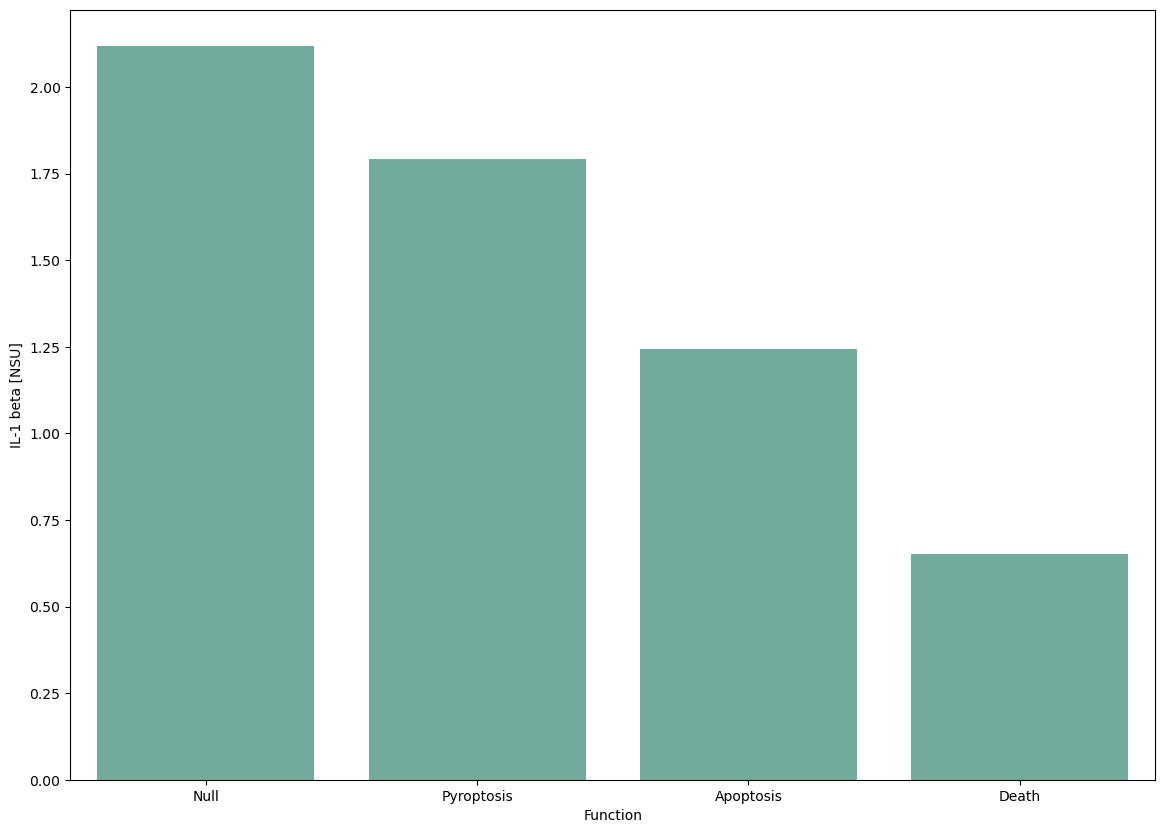

In [13]:
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot(
    y="IL-1 beta [NSU]",
    x="Function",
    data=nELISA_plate_430420,
    estimator=max,
    ci=None,
    color="#69b3a2",
)